In [ ]:
from google.colab import drive
drive.mount('mydrive')

Mounted at mydrive


In [ ]:
from zipfile import ZipFile
file_name = ['RAVDESS', 'SAVEE', 'CREMA']

for f in file_name:
  with ZipFile(f'/content/mydrive/MyDrive/My Files/Datasets/EmoSense/audio/{f}.zip', 'r') as zip:
    zip.extractall()
    print("Done")

Done
Done
Done


In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
Ravdess = os.path.join('data', 'RAVDESS', '')
Savee = os.path.join('ALL', '')
Crema = os.path.join('AudioWAV', '')

In [ ]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,disgust,data/RAVDESS/Actor_04/03-01-07-02-01-01-04.wav
1,disgust,data/RAVDESS/Actor_04/03-01-07-02-02-02-04.wav
2,sad,data/RAVDESS/Actor_04/03-01-04-01-01-01-04.wav
3,angry,data/RAVDESS/Actor_04/03-01-05-02-02-01-04.wav
4,calm,data/RAVDESS/Actor_04/03-01-02-02-01-02-04.wav


In [ ]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,neutral,AudioWAV/1023_TIE_NEU_XX.wav
1,happy,AudioWAV/1057_IWL_HAP_XX.wav
2,fear,AudioWAV/1064_IWL_FEA_XX.wav
3,disgust,AudioWAV/1082_TAI_DIS_XX.wav
4,sad,AudioWAV/1008_IEO_SAD_HI.wav


In [ ]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

,Emotions,Path
0,disgust,ALL/KL_d10.wav
1,happy,ALL/JK_h03.wav
2,neutral,ALL/KL_n08.wav
3,sad,ALL/KL_sa13.wav
4,neutral,ALL/DC_n21.wav


In [ ]:
# creating Dataframe using all the 3 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,disgust,data/RAVDESS/Actor_04/03-01-07-02-01-01-04.wav
1,disgust,data/RAVDESS/Actor_04/03-01-07-02-02-02-04.wav
2,sad,data/RAVDESS/Actor_04/03-01-04-01-01-01-04.wav
3,angry,data/RAVDESS/Actor_04/03-01-05-02-02-01-04.wav
4,calm,data/RAVDESS/Actor_04/03-01-02-02-01-02-04.wav


<Axes: xlabel='Emotions', ylabel='count'>

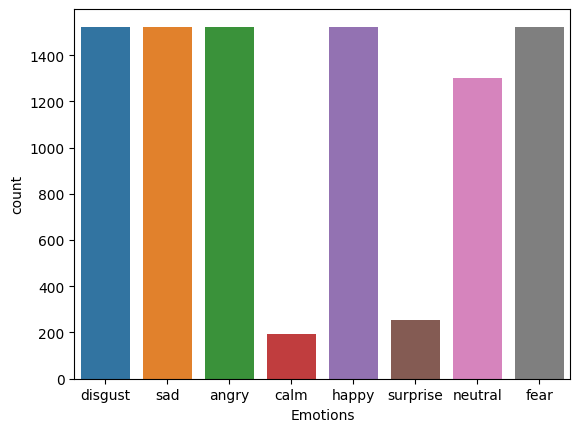

In [ ]:
import seaborn as sns
sns.countplot(x='Emotions', data=data_path)